<a href="https://colab.research.google.com/github/Rizqanziyan/Python-14/blob/main/Tugas_Python_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rizqan Ziyan Dafin / 1101180388 / TT-42-02

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
f=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [4]:
#Frekuensi 1800 MHz
LpUrban=cos(f3,loc1,tower,user,d)
LpSuburban=cos(f3,loc2,tower,user,d)
LpOpen=cos(f3,loc3,tower,user,d)

#Model Urban
Lpf=cos(f,loc1,tower,user,d)
Lpf2=cos(f2,loc2,tower,user,d)
Lpf3=cos(f3,loc3,tower,user,d)

In [5]:
d_sort=d[np.argsort(d)]

#Frekuensi 1800 MHz
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

#Model Urban
f_sort=Lpf[np.argsort(d)]
f2_sort=Lpf2[np.argsort(d)]
f3_sort=Lpf3[np.argsort(d)]

In [6]:
def dayter (ht, hl, gt, gr):
  dtr = (10*np.log10(ht)) - hl + gt + gr
  dtr = 10**(dtr/10)
  return dtr

power_tran = 30000 #Miliwatt
gain_tran = 10 #dB
gain_rece = 2 #dB

In [7]:
DTUrban = dayter(power_tran, Urban_sort, gain_tran, gain_rece)
DTSuburban = dayter(power_tran, Suburban_sort, gain_tran, gain_rece)
DTOpen = dayter(power_tran, Open_sort, gain_tran, gain_rece)
DTf2 = dayter(power_tran, f2_sort, gain_tran, gain_rece)
DTf3 = dayter(power_tran, f3_sort, gain_tran, gain_rece)
DTf = dayter(power_tran, f_sort, gain_tran, gain_rece)

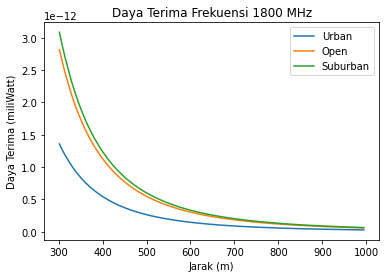

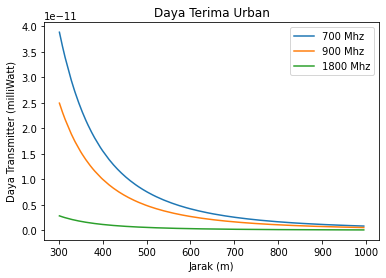

In [8]:
#Frekuensi 1800 MHz
plt.figure()
plt.title("Daya Terima Frekuensi 1800 MHz")
plt.plot(d_sort, DTUrban, label = "Urban")
plt.plot(d_sort, DTOpen, label = "Open")
plt.plot(d_sort, DTSuburban, label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.legend()
plt.show()

#Model Urban
plt.figure()
plt.title("Daya Terima Urban")
plt.plot(d_sort, DTf2, label = "700 Mhz")
plt.plot(d_sort, DTf, label = "900 Mhz")
plt.plot(d_sort, DTf3, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Transmitter (milliWatt)')
plt.legend()
plt.show()

In [9]:
def snr(dtr, BW):
  noise = -174 + (10*np.log10(BW))
  noise = 10**(noise/10)
  stnr = dtr/noise
  return stnr

bw =  5000000 #Hz

In [10]:
SNRUrban = snr(DTUrban, bw)
SNRSuburban = snr(DTSuburban, bw)
SNROpen = snr(DTOpen, bw)
SNRf = snr(DTf, bw)
SNRf2 = snr(DTf2, bw)
SNRf3 = snr(DTf3, bw)

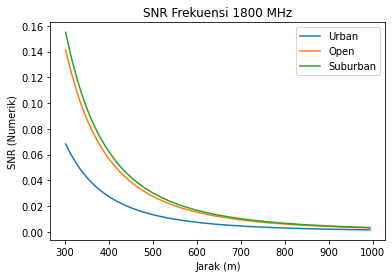

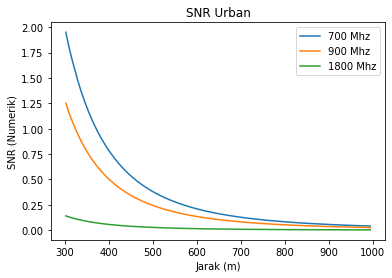

In [11]:
#Frekuensi 1800 MHz
plt.figure()
plt.title("SNR Frekuensi 1800 MHz")
plt.plot(d_sort, SNRUrban, label = "Urban")
plt.plot(d_sort, SNROpen, label = "Open")
plt.plot(d_sort, SNRSuburban, label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()

#Model Urban
plt.figure()
plt.title("SNR Urban")
plt.plot(d_sort, SNRf2, label = "700 Mhz")
plt.plot(d_sort, SNRf, label = "900 Mhz")
plt.plot(d_sort, SNRf3, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()

In [12]:
def kapasitas (sig, BW):
  kpsts = BW*(np.log2(1+sig))
  return kpsts

In [13]:
KapasitasUrban = kapasitas(SNRUrban, bw)
KapasitasSuburban = kapasitas(SNRSuburban, bw)
KapasitasOpen = kapasitas(SNROpen, bw)
Kapasitasf = kapasitas(SNRf, bw)
Kapasitasf2 = kapasitas(SNRf2, bw)
Kapasitasf3 = kapasitas(SNRf3, bw)

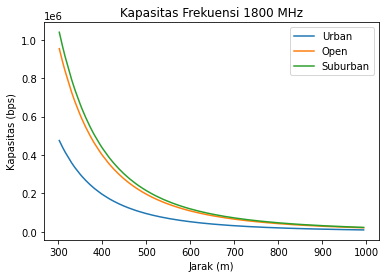

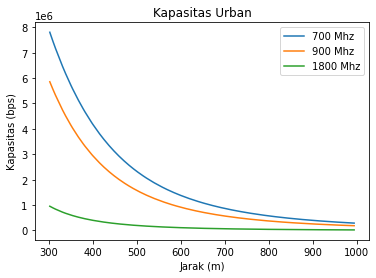

In [14]:
#Frekuensi 1800 MHz
plt.figure()
plt.title("Kapasitas Frekuensi 1800 MHz")
plt.plot(d_sort, KapasitasUrban, label = "Urban")
plt.plot(d_sort, KapasitasOpen, label = "Open")
plt.plot(d_sort, KapasitasSuburban, label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.legend()
plt.show()

#Model Urban
plt.figure()
plt.title("Kapasitas Urban")
plt.plot(d_sort, Kapasitasf2, label = "700 Mhz")
plt.plot(d_sort, Kapasitasf, label = "900 Mhz")
plt.plot(d_sort, Kapasitasf3, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.legend()
plt.show()